In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
import numpy as np

%matplotlib inline

import pydotplus
from IPython.display import Image

In [2]:
# Loading data

df_churn = pd.read_csv("processed_data.csv")
df_churn.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [3]:
X = df_churn.copy()
X.drop("Exited", axis=1, inplace=True)
X.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0


In [4]:
y = df_churn["Exited"].ravel()
y[:5]

array([1, 0, 1, 0, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
#Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=2)

In [11]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [12]:
predictions = rf_model.predict(X_test)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1981,0
Actual 1,508,11


Accuracy Score : 0.7968
Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1981
           1       1.00      0.02      0.04       519

    accuracy                           0.80      2500
   macro avg       0.90      0.51      0.46      2500
weighted avg       0.84      0.80      0.71      2500



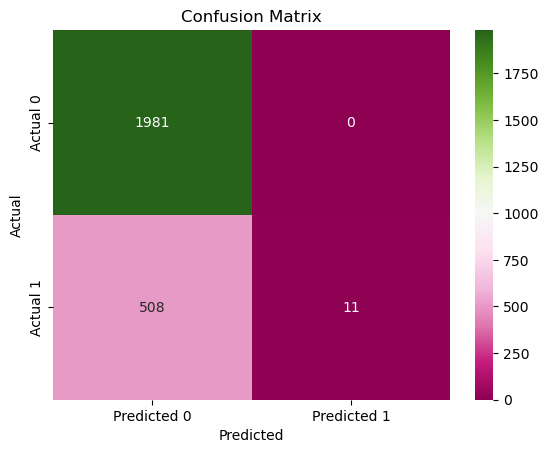

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap using Seaborn
sns.heatmap(cm_df, annot=True, cmap="PiYG", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.3584123060343783, 'Age'),
 (0.2385544530351843, 'NumOfProducts'),
 (0.12473390793012049, 'Geography_Germany'),
 (0.0838089759700379, 'IsActiveMember'),
 (0.05792394276647545, 'Balance'),
 (0.04188398081966503, 'CreditScore'),
 (0.027373062382331826, 'Geography_France'),
 (0.02520236015688086, 'Gender_Male'),
 (0.020796614547265273, 'Gender_Female'),
 (0.01316220192756752, 'Geography_Spain')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

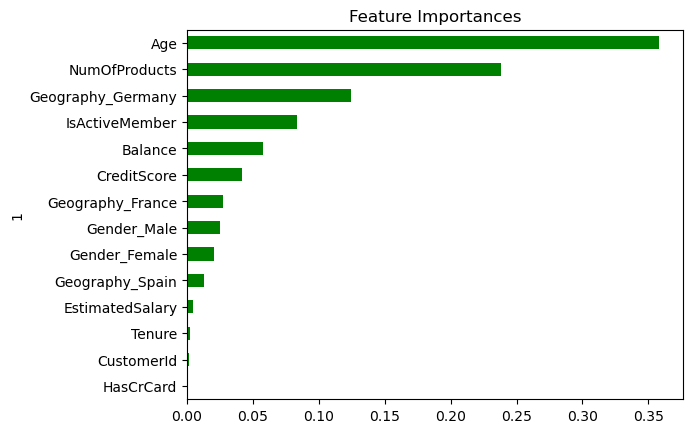

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Feature Importances', legend=False)

In [18]:
print('Parameters currently in use:\n')
pprint(rf_model.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [20]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.80906667 0.80653333 0.80706667 0.86173333 0.86213333 0.86386667
 0.86173333 0.86333333 0.86213333], using {'max_depth': 8, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.265268,0.035719,0.023167,0.007953,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.805333,0.814000,0.802000,0.812000,0.812000,0.809067,0.004592,7
1,0.460034,0.054491,0.031552,0.000715,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.808000,0.802667,0.808667,0.804667,0.808667,0.806533,0.002437,9
2,1.519116,0.687572,0.091204,0.018852,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.804667,0.804000,0.804667,0.808000,0.814000,0.807067,0.003738,8
3,0.733915,0.119469,0.038432,0.014663,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.857333,0.860000,0.868667,0.855333,0.867333,0.861733,0.005343,5
4,1.060568,0.176910,0.050646,0.007978,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.862667,0.861333,0.868000,0.852000,0.866667,0.862133,0.005632,3
5,1.800555,0.052057,0.097480,0.014897,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.863333,0.860667,0.873333,0.856000,0.866000,0.863867,0.005772,1
6,0.628310,0.020907,0.037145,0.009124,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.865333,0.857333,0.865333,0.860000,0.860667,0.861733,0.003144,6
7,1.269121,0.132954,0.068225,0.014488,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.868667,0.856000,0.868000,0.859333,0.864667,0.863333,0.004935,2
8,2.354567,0.041815,0.112978,0.006056,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.864000,0.856000,0.866000,0.863333,0.861333,0.862133,0.003410,3


([<matplotlib.axis.YTick at 0x7ff4f39fcb50>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

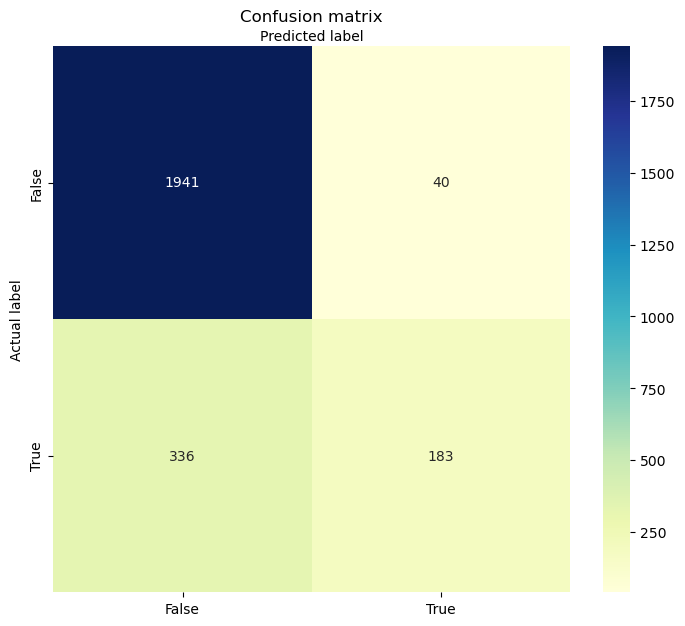

In [23]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)